In [38]:
#Classe generatore di labirinti
import random
import time 
import matplotlib.pyplot as plt
import numpy as np
import sys
import heapq
from prettytable import PrettyTable
from os.path import exists
from os import mkdir
from os import remove
from os import listdir
from os.path import isfile

In [39]:
 class cellStatus: #Classe per lo status della cella
  n_visited = 'u'
  visited = 'c'
  wall_l = 'w'
  entrance_l = "E"
  exit_l = "U"


class MazeGenerator:
  #membri privati
  __maze = [] 
  __size = 0
  __enumCellStatus = cellStatus()
  __entrance = [] #Posizione dell'entrata
  __exit = [] #Posizione dell'uscita

  def __init__(self,size):
    self.__size = size
  def setSize(self,size):
    self.__size = size
  def getMaze(self):
    return self.__maze
  def genereteWithSettedSize(self):
    self.__maze.clear()
    for i in range(0,self.__size + 1):
        line = []
        for j in range(0,self.__size + 1):
            line.append(self.__enumCellStatus.n_visited)
        self.__maze.append(line)

  def getSize(self):
    return (len(self.__maze) - 1) # - 1 perchè una dimensione ci serve per il layer esterno

#Permette di stampare il labirinto il formato letterale
  def debugPrint(self):
    for i in range(0,len(self.__maze[0])):
        for j in range(0,len(self.__maze[0])):
            print(self.__maze[i][j], end = " ")
        print('\n')

#Alla fine della generazione sostituisce tutte le celle non visitate con un muro
  def __createWall(self): #funzione privata perchè non la esponiamo all'utente, ci serve solo di appoggio per la creazione
    for i in range(0,len(self.__maze[0])):
        for j in range(0,len(self.__maze[0])):
            if(self.__maze[i][j] == self.__enumCellStatus.n_visited):
                self.__maze[i][j] = self.__enumCellStatus.wall_l

  #Conta quante celle visitate sono attorno ad una certa cella
  def __count_surrounding_cell(self,wall):
    surrounding_cell = 0
    if(self.__maze[wall[0]+1][wall[1]] == self.__enumCellStatus.visited):#controllo in basso
        surrounding_cell +=1
    if(self.__maze[wall[0]-1][wall[1]] == self.__enumCellStatus.visited):#controllo sopra
        surrounding_cell +=1
    if(self.__maze[wall[0]][wall[1]+1] == self.__enumCellStatus.visited): #controllo a destra
        surrounding_cell +=1
    if(self.__maze[wall[0]][wall[1]-1] == self.__enumCellStatus.visited): #controllo a sinistra
        surrounding_cell +=1
    return surrounding_cell

  #cencella il muro dalla lista di muri passati alla funzione 
  def __deleteWall(self,walls,wall):
    for w in walls:
        if(w[0] == wall[0] and w[1] == wall[1]):  
            walls.remove(w)
  
  #Genera il labirinto secondo un approccio recursive-backtracking(wrapper)
  def generateBack(self):
    x = random.choice(range(2,len(self.__maze)-2))
    y = random.choice(range(2,len(self.__maze)-2))
    S_point = [y,x]
    sys.setrecursionlimit(10000)
    self.__createWall()
    self.__backtrack(S_point[0],S_point[1])
    self.__makeUnvisitedOuterLayer()
    self.__createWall()

#Funzioni di appoggio per l'algoritmo
  def __makeVisitedOuterLayer(self):
    for i in range(0,len(self.__maze)):
      self.__maze[i][0] = self.__enumCellStatus.visited
    for i in range(0,len(self.__maze)):
      self.__maze[i][len(self.__maze) - 1] = self.__enumCellStatus.visited
    for j in range(0,len(self.__maze)):
      self.__maze[0][j] = self.__enumCellStatus.visited
    for j in range(0,len(self.__maze)):
      self.__maze[len(self.__maze) - 1][j] = self.__enumCellStatus.visited
  

  def __makeUnvisitedOuterLayer(self): 
    for i in range(0,len(self.__maze)):
      self.__maze[i][0] = self.__enumCellStatus.n_visited
    for i in range(0,len(self.__maze)):
      self.__maze[i][len(self.__maze) - 1] = self.__enumCellStatus.n_visited
    for j in range(0,len(self.__maze)):
      self.__maze[0][j] = self.__enumCellStatus.n_visited
    for j in range(0,len(self.__maze)):
      self.__maze[len(self.__maze) - 1][j] = self.__enumCellStatus.n_visited
  
  def __backtrack(self,cx, cy):
      self.__maze[cy][cx] = self.__enumCellStatus.visited
      
      directions = [(0, -2), (0, 2), (-2, 0), (2, 0)]
      random.shuffle(directions)
      
      for dx, dy in directions:
          nx, ny = cx + dx, cy + dy
          
          if 0 <= nx < len(self.__maze) and 0 <= ny < len(self.__maze) and self.__maze[ny][nx] == self.__enumCellStatus.wall_l:
              mx, my = cx + dx // 2, cy + dy // 2
              self.__maze[my][mx] = self.__enumCellStatus.visited
              self.__backtrack(nx, ny)
    

  #Funzione per generare punti casuali all'interno del labirinto
  def __generateRandomPoint(self):
    lecit_coordinate = False
    starting_x = 0
    starting_y = 0
    while(not(lecit_coordinate)):
      starting_x = int(random.random()*len(self.__maze))
      starting_y = int(random.random()*len(self.__maze))
      lecit_coordinate = True
      if(starting_x <= 0 or starting_x >= len(self.__maze)-1): 
          lecit_coordinate = False
      if(starting_y <= 0 or starting_y >= len(self.__maze)-1):
          lecit_coordinate = False
    return [starting_y,starting_x]

  def generateGT(self):
    self.__createWall()
     # Funzione per controllare se una cella è valida
    def is_valid(row, col):
        return 0 <= row < len(self.__maze) and 0 <= col < len(self.__maze)

    # Funzione per ottenere una lista di vicini validi non visitati di una cella
    def get_unvisited_neighbors(row, col):
        neighbors = []
        if is_valid(row - 2, col) and self.__maze[row - 2][col] == self.__enumCellStatus.wall_l:
            neighbors.append((row - 2, col))
        if is_valid(row + 2, col) and self.__maze[row + 2][col] == self.__enumCellStatus.wall_l:
            neighbors.append((row + 2, col))
        if is_valid(row, col - 2) and self.__maze[row][col - 2] == self.__enumCellStatus.wall_l:
            neighbors.append((row, col - 2))
        if is_valid(row, col + 2) and self.__maze[row][col + 2] == self.__enumCellStatus.wall_l:
            neighbors.append((row, col + 2))
        return neighbors

    # Scegli una cella casuale come punto di partenza
    start_row = random.randint(0, len(self.__maze) // 2) * 2
    start_col = random.randint(0, len(self.__maze) // 2) * 2
    self.__maze[start_row][start_col] = self.__enumCellStatus.visited  # Segna la cella iniziale come visitata
    visited_count = 1

    # Aggiungi la cella iniziale al set delle celle attive
    active_cells = set([(start_row, start_col)])

    while visited_count < (len(self.__maze) * len(self.__maze)) // 4:
        # Scegli una cella casuale tra quelle attive
        current_row, current_col = random.choice(list(active_cells))

        # Ottieni i vicini non visitati
        neighbors = get_unvisited_neighbors(current_row, current_col)

        if neighbors:
            # Scegli un vicino casuale e lo collega alla cella corrente
            next_row, next_col = random.choice(neighbors)
            self.__maze[next_row][next_col] = self.__enumCellStatus.visited  # Segna il vicino come visitato

            # Rimuovi il muro tra la cella corrente e il vicino
            if next_row < current_row:
                self.__maze[current_row - 1][current_col] = self.__enumCellStatus.visited
            elif next_row > current_row:
                self.__maze[current_row + 1][current_col] = self.__enumCellStatus.visited
            elif next_col < current_col:
                self.__maze[current_row][current_col - 1] = self.__enumCellStatus.visited
            else:
                self.__maze[current_row][current_col + 1] = self.__enumCellStatus.visited

            # Aggiungi il vicino al set delle celle attive
            active_cells.add((next_row, next_col))
            visited_count += 1
        else:
            # Rimuovi la cella corrente dal set delle celle attive
            active_cells.remove((current_row, current_col))
    self.__makeUnvisitedOuterLayer()
    self.__createWall()

#genera il labirinto secondo l'algoritmo di Primm
  def generateMazePrimm(self):
    walls = []
    S_point = self.__generateRandomPoint()
    starting_y = S_point[0]
    starting_x = S_point[1]
    self.__maze[starting_y][starting_x] = self.__enumCellStatus.visited
    walls.append([starting_y-1,starting_x])
    walls.append([starting_y+1,starting_x])
    walls.append([starting_y,starting_x-1])
    walls.append([starting_y,starting_x+1])
    for wall in walls:
      self.__maze[wall[0]][wall[1]] = self.__enumCellStatus.wall_l
    while (walls):
      random_wall = walls[int(random.random()*len(walls))-1]
      #controllo se è uno spigolo
      if((random_wall[0] == 0 and random_wall[1] == 0) or (random_wall[0] == len(self.__maze) - 1 and random_wall[1] == 0) or (random_wall[0] == 0 and random_wall[1] == len(self.__maze) - 1) or (random_wall[0] == len(self.__maze) - 1 and random_wall[1] == len(self.__maze) -1)):
          self.__deleteWall(walls,random_wall)
          continue
      if(random_wall[0] == 0 or random_wall[0] == len(self.__maze) - 1): #controllo se è un estremo alto o basso
          if((self.__maze[random_wall[0]][random_wall[1] -1] == self.__enumCellStatus.visited and self.__maze[random_wall[0]][random_wall[1] + 1] == self.__enumCellStatus.n_visited) or (self.__maze[random_wall[0]][random_wall[1] -1] == self.__enumCellStatus.n_visited and self.__maze[random_wall[0]][random_wall[1] + 1] == self.__enumCellStatus.visited)): #posso solo controllare a destra e a sinistra
              if(self.__count_surrounding_cell(random_wall) < 2):
                  self.__maze[random_wall[0]][random_wall[1]] = self.__enumCellStatus.visited
                  if(random_wall[0] == 0): 
                      if(self.__maze[random_wall[0]+1][random_wall[1]] != self.__enumCellStatus.visited):
                          self.maze[random_wall[0]+1][random_wall[1]] = self.enumCellStatus.wall_l
                          walls.append([random_wall[0]+1,random_wall[1]])
                  else:
                      if(self.maze[random_wall[0]-1][random_wall[1]] != self.enumCellStatus.visited):
                          self.maze[random_wall[0]-1][random_wall[1]] = self.enumCellStatus.wall_l
                          walls.append([random_wall[0]-1,random_wall[1]])
          self.__deleteWall(walls,random_wall)
          continue
      if(random_wall[1] == 0 or random_wall[1] == len(self.__maze) - 1): #controllo se è un estremo destro o sinistro
          if((self.__maze[random_wall[0]-1][random_wall[1]] == self.__enumCellStatus.visited and self.__maze[random_wall[0]+1][random_wall[1]] == self.__enumCellStatus.n_visited) or (self.__maze[random_wall[0]-1][random_wall[1]] == self.__enumCellStatus.n_visited and self.__maze[random_wall[0]+1][random_wall[1]] == self.__enumCellStatus.visited)):
              if(self.__count_surrounding_cell(random_wall) < 2):
                  self.__maze[random_wall[0]][random_wall[1]] = self.__enumCellStatus.visited
                  if(random_wall[1] == 0):
                      if(self.__maze[random_wall[0]][random_wall[1]+1] != self.__enumCellStatus.visited):
                          self.__maze[random_wall[0]][random_wall[1] + 1] = self.__enumCellStatus.wall_l
                          walls.append([random_wall[0],random_wall[1] + 1]) 
                  else:
                      if(self.__maze[random_wall[0]][random_wall[1]-1] != self.__enumCellStatus.visited):
                          self.__maze[random_wall[0]][random_wall[1] - 1] = self.__enumCellStatus.wall_l
                          walls.append([random_wall[0],random_wall[1] - 1]) 
          self.__deleteWall(walls,random_wall)
          continue
      #se ha superato tutti i controlli precedenti è un nodo interno
      if(((self.__maze[random_wall[0] - 1][random_wall[1]] == self.__enumCellStatus.visited) and (self.__maze[random_wall[0] + 1][random_wall[1]] == self.__enumCellStatus.n_visited)) or ((self.__maze[random_wall[0] - 1][random_wall[1]] == self.__enumCellStatus.n_visited) and (self.__maze[random_wall[0] + 1][random_wall[1]] == self.__enumCellStatus.visited))): #controllo verticale
          if(self.__count_surrounding_cell(random_wall) < 2):
              self.__maze[random_wall[0]][random_wall[1]] = self.__enumCellStatus.visited
              if(self.__maze[random_wall[0] - 1][random_wall[1]] != self.__enumCellStatus.visited): #Prendo il muro sopra
                  self.__maze[random_wall[0] - 1][random_wall[1]] = self.__enumCellStatus.wall_l
                  walls.append([random_wall[0]-1,random_wall[1]])
              if(self.__maze[random_wall[0] + 1][random_wall[1]] != self.__enumCellStatus.visited): # Prendo il muro sotto
                  self.__maze[random_wall[0] + 1][random_wall[1]] = self.__enumCellStatus.wall_l
                  walls.append([random_wall[0]+1,random_wall[1]])
              if(self.__maze[random_wall[0]][random_wall[1] - 1] != self.__enumCellStatus.visited): # Prendo il muro di sinistra
                  self.__maze[random_wall[0]][random_wall[1] - 1] = self.__enumCellStatus.wall_l
                  walls.append([random_wall[0],random_wall[1] - 1])
              if(self.__maze[random_wall[0]][random_wall[1] + 1] != self.__enumCellStatus.visited): # Prendo il muro di destra
                  self.__maze[random_wall[0]][random_wall[1] + 1] = self.__enumCellStatus.wall_l
                  walls.append([random_wall[0],random_wall[1] + 1])
      elif(((self.__maze[random_wall[0]][random_wall[1]-1] == self.__enumCellStatus.visited) and (self.__maze[random_wall[0]][random_wall[1]+1] == self.__enumCellStatus.n_visited)) or ((self.__maze[random_wall[0]][random_wall[1] - 1] == self.__enumCellStatus.n_visited) and (self.__maze[random_wall[0]][random_wall[1] + 1] == self.__enumCellStatus.visited))):
          if(self.__count_surrounding_cell(random_wall) < 2):
              self.__maze[random_wall[0]][random_wall[1]] = self.__enumCellStatus.visited
              if(self.__maze[random_wall[0] - 1][random_wall[1]] != self.__enumCellStatus.visited): #Prendo il muro sopra
                  self.__maze[random_wall[0] - 1][random_wall[1]] = self.__enumCellStatus.wall_l
                  walls.append([random_wall[0]-1,random_wall[1]])
              if(self.__maze[random_wall[0] + 1][random_wall[1]] != self.__enumCellStatus.visited): # Prendo il muro sotto
                  self.__maze[random_wall[0] + 1][random_wall[1]] = self.__enumCellStatus.wall_l
                  walls.append([random_wall[0]+1,random_wall[1]])
              if(self.__maze[random_wall[0]][random_wall[1] - 1] != self.__enumCellStatus.visited): # Prendo il muro di sinistra
                  self.__maze[random_wall[0]][random_wall[1] - 1] = self.__enumCellStatus.wall_l
                  walls.append([random_wall[0],random_wall[1] - 1])
              if(self.__maze[random_wall[0]][random_wall[1] + 1] != self.__enumCellStatus.visited): # Prendo il muro di destra
                  self.__maze[random_wall[0]][random_wall[1] + 1] = self.__enumCellStatus.wall_l
                  walls.append([random_wall[0],random_wall[1] + 1])
      self.__deleteWall(walls,random_wall)
      continue
    self.__createWall()

#Permette di stampare il labirinto in un formato user frendly 
  def printMaze(self):
    nrows = len(self.__maze)
    ncols = len(self.__maze[0])
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    for row in range(nrows):
        for col in range(ncols):
            if self.__maze[row][col] == self.__enumCellStatus.wall_l:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='black', linewidth=1))
            elif self.__maze[row][col] == self.__enumCellStatus.visited:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='white', linewidth=1))
            elif self.__maze[row][col] == self.__enumCellStatus.exit_l:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='red'))
            elif self.__maze[row][col] == self.__enumCellStatus.entrance_l: 
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='green')) 

            # Calcola le coordinate del centro della cella
            center_x = col + 1
            center_y = nrows - row - 2

            # Ottieni il valore della cella
            cell_value = self.__maze[row][col]

            # Aggiungi il valore come testo al centro della cella
            ax.text(center_x, center_y, cell_value, ha='center', va='center')

    ax.autoscale_view()
    plt.axis('off')
    plt.show()

  
  #permette di piazzare opportunamente l'entrata del labirinto
  def __placeEntrance(self):
    x = 0
    y = 0
    flip_coin = 0
    valid = False
    while valid == False:
      flip_coin= int(random.random()*3)
      #0 orizzontale - alto
      #1 verticale - destra
      #2 verticale - sinistra
      if(flip_coin == 0):
        x = int(random.random() * (len(self.__maze)-1))
        y = 0
        if(self.__maze[y+1][x] == self.__enumCellStatus.visited):
          valid = True
      elif(flip_coin == 1):
        y = int(random.random() * (len(self.__maze)-1))
        x = len(self.__maze)-1
        if(self.__maze[y][x-1] == self.__enumCellStatus.visited):
          valid = True
      else: 
        y = int(random.random() * (len(self.__maze)-1))
        x = 0
        if(self.__maze[y][x+1] == self.__enumCellStatus.visited):
          valid = True
    self.__entrance = [y,x]
    self.__maze[y][x] = self.__enumCellStatus.entrance_l

#Permette di piazzare l'uscita del labirinto, la distanza è fissata per essere almeno il 3% delle caselle del labirinto
#Se non si arriva a convergenza però devo abbassare questa soglia, quindi ogni 10 diminuisco la soglia
  def __placeExit(self):
    x = 0
    y = 0
    valid = False
    cell = []
    addingFactor = 0
    countNotFit = 0
    distanceFromEntrance = int((3*(len(self.__maze)*len(self.__maze)))/100)
    while valid == False:
      x = int(random.random() * (len(self.__maze) - 1)) 
      y = int(random.random() * (len(self.__maze) - 1)) 
      cell = [y,x]
      self.__exit = cell
      if((x + addingFactor) < len(self.__maze)):
        x = x + addingFactor
      else:
        x = x + np.sqrt(self.getManhattanDistEU())
      if((y + addingFactor) < len(self.__maze)):
        y = y + addingFactor
      else:
        y = y + np.sqrt(self.getManhattanDistEU())
      if( self.__maze[cell[0]][cell[1]] != self.__enumCellStatus.wall_l): #devo piazzarlo dove non ho un muro
        if (self.__count_surrounding_cell(cell) >= 1 and self.getEuclideanDistEU() >= distanceFromEntrance): 
          valid = True
          self.__maze[cell[0]][cell[1]] = self.__enumCellStatus.exit_l
        else:
            countNotFit += 1
            addingFactor += 1
            if(countNotFit >= 10):
              distanceFromEntrance -= 5
              countNotFit = 0
    #Questa funzione verifica se una certa cella è uno spigolo e se lo è dice che spigolo è
  def __isEdge(self,cell): #il controllo degli edge va fatto sulla dimensione -1 poichè non dobbiamo considerare il layer esterno di muri 
    edge = 0
    type_of_edge = 0
    if(cell[0] == 1 and cell[1] == 1): #Spigolo in alto a sinistra 
      edge = 1
      type_of_edge = 0
    elif(cell[0] == len(self.__maze)-2 and cell[1] == 1): #Spigolo in basso a sinistra 
      edge = 1
      type_of_edge = 1
    elif(cell[0] == 1 and cell[1] == len(self.__maze)-2): #Spigolo in alto a destra
      edge = 1
      type_of_edge = 2
    elif (cell[0] == len(self.__maze)-2 and cell[1] == len(self.__maze)-2): #Spigolo in basso a destra
      edge = 1
      type_of_edge = 3
    return [edge,type_of_edge]

#Questa funzione permette di cancellare un muro per sbloccare il vicolo cieco
  def __ereaseWall(self,cell): 
    erased = False
    randomChoice = 0 
    if((cell[0] + 1 < len(self.__maze)-2) and (self.__maze[cell[0] + 1][cell[1]] == self.__enumCellStatus.wall_l)): #controllo che non stia al limite
      if(self.__maze[cell[0] + 2][cell[1]] == self.__enumCellStatus.visited):
        erased = True
        self.__maze[cell[0] + 1][cell[1]] = self.__enumCellStatus.visited
    elif((cell[0] - 1 > 1) and (self.__maze[cell[0] - 1][cell[1]] == self.__enumCellStatus.wall_l)):
      if(self.__maze[cell[0] - 2][cell[1]] == self.__enumCellStatus.visited):
        erased = True
        self.__maze[cell[0] - 1][cell[1]] = self.__enumCellStatus.visited
    elif((cell[1] + 1 < len(self.__maze)-2) and (self.__maze[cell[0]][cell[1] + 1] == self.__enumCellStatus.wall_l)):
      if(self.__maze[cell[0]][cell[1] + 2] == self.__enumCellStatus.visited):
        erased = True
        self.__maze[cell[0]][cell[1] + 1] = self.__enumCellStatus.visited
    elif((cell[1] -1 > 1) and (self.__maze[cell[0]][cell[1] -1 ] == self.__enumCellStatus.wall_l)):
      if(self.__maze[cell[0]][cell[1] - 2] == self.__enumCellStatus.visited):
        erased = True
        self.__maze[cell[0]][cell[1] - 1] = self.__enumCellStatus.visited
    if(erased != True): #scelta casuale
      while(erased != True):
        randomChoice = int(random.random()*2)
        if(randomChoice == 0):#Scelgo di eliminare i muri posti o sopra o sotto
          randomChoice = int(random.random()*2)
          if(randomChoice == 0): #Muro alto
            if((cell[0] - 1 > 1) and self.__maze[cell[0] - 1][cell[1]] == self.__enumCellStatus.wall_l):
              erased = True
              self.__maze[cell[0] - 1][cell[1]] = self.__enumCellStatus.visited
          else: #Muro basso
            if((cell[0] + 1 < len(self.__maze)-2) and self.__maze[cell[0] + 1][cell[1] ] == self.__enumCellStatus.wall_l):
              erased = True
              self.__maze[cell[0] + 1][cell[1]] = self.__enumCellStatus.visited
        else: #scelgo di eliminare i laterali
          randomChoice = int(random.random()*2)
          if(randomChoice == 0): #Muro destra
            if((cell[1] - 1 > 1) and self.__maze[cell[0]][cell[1] - 1] == self.__enumCellStatus.wall_l):
              erased = True
              self.__maze[cell[0]][cell[1] - 1] = self.__enumCellStatus.visited
          else: #Muro sinistra
            if((cell[1] + 1 < len(self.__maze)-2) and self.__maze[cell[0]][cell[1] + 1] == self.__enumCellStatus.wall_l):
              erased = True
              self.__maze[cell[0]][cell[1] + 1] = self.__enumCellStatus.visited

  #La funzione è scritta per la politica di gestione ddegli spigoli del labirinto 
  def __ereaseEdgeWall(self,cell,edge_type): #Questa funzione lavora in modo diverso
#Per gli spigoli applichiamo la politica free-edge (inventata da me), che consiste nel non circondare gli spigoli di muri
    match edge_type: #equivalente switch case
      case 0: #Spigolo alto a sinistra 
        self.__maze[cell[0] + 1][cell[1]] = self.__enumCellStatus.visited
        self.__maze[cell[0]][cell[1] + 1] = self.__enumCellStatus.visited
      case 1: #Spigolo basso a sinistra 
        self.__maze[cell[0] - 1][cell[1]] = self.__enumCellStatus.visited
        self.__maze[cell[0]][cell[1] + 1] = self.__enumCellStatus.visited
      case 2: #Spigolo alto a destra 
        self.__maze[cell[0] + 1][cell[1]] = self.__enumCellStatus.visited
        self.__maze[cell[0]][cell[1] - 1] = self.__enumCellStatus.visited
      case 3: #Spigolo basso a destra  
        self.__maze[cell[0] - 1][cell[1]] = self.__enumCellStatus.visited
        self.__maze[cell[0]][cell[1] - 1] = self.__enumCellStatus.visited
      case _: 
        print("Errore",end = " ")

  def countDeadEnds(self):
    cell = []
    surrounding_cell = 0
    deadends = 0
    for i in range(1,len(self.__maze[0])-1):
        for j in range(1,len(self.__maze[0])-1):
          cell = [i,j]
          if(self.__maze[cell[0]][cell[1]] != self.__enumCellStatus.wall_l):
            surrounding_cell = self.__count_surrounding_cell(cell) #mi conta quante celle visitate sono in collegamento con la cella ispezionata
            if(surrounding_cell < 2): 
              deadends += 1
    return deadends

  #Questa funzione permette di elimiare i vicoli ciechi del labirinto e ci avvisa se ne ha trovato uno
  def __deteleDeadEnd(self):
    cell = []
    surrounding_cell = 0
    edge_control = []
    dedEndDetected = False
    for i in range(1,len(self.__maze[0])-1):
        for j in range(1,len(self.__maze[0])-1):
          cell = [i,j]
          if(self.__maze[cell[0]][cell[1]] != self.__enumCellStatus.wall_l):
            surrounding_cell = self.__count_surrounding_cell(cell) #mi conta quante celle visitate sono in collegamento con la cella ispezionata
            if(surrounding_cell < 2):
              dedEndDetected = True
              edge_control = self.__isEdge(cell)
              if(edge_control[0] != 1): #Devo mettere 1 poichè il tipo booleano non può essere acceduto con []
                self.__ereaseWall(cell)
              else:
                self.__ereaseEdgeWall(cell,edge_control[1])
    return dedEndDetected
  
  def fillWithValues(self):
    value = 0
    for i in range(1,len(self.__maze) - 1):
      for j in range(1,len(self.__maze) - 1):
        value = 1+int(random.random() *100)
        if(self.__maze[i][j] == self.__enumCellStatus.visited):
            self.__maze[i][j] = value
  
  #Questa funzione permette di rendere il labirinto imperfetto
  def makeImperfet(self):
    self.__deteleDeadEnd()
    
  #Questa funzione permette di rendere il labirinto completamente connesso, senza punti ciechi
  def makeFullyConnected(self):
    while(self.__deteleDeadEnd()):
      print("Cancello i vicoli ciechi")
      pass
  
  #Piazzo solo entrata ed uscita
  def placeEU(self):
    self.__placeEntrance()
    self.__placeExit()

  #Permette di calcolare la distanza di manhattan tra ingresso ed uscita
  def getManhattanDistEU(self):
    return (np.abs(self.__entrance[0] - self.__exit[0]) + np.abs(self.__entrance[1] - self.__exit[1]))

  #Permette di calcolare la distanza di Euclide tra ingresso ed uscita
  def getEuclideanDistEU(self):
     return np.sqrt(np.power(self.__entrance[0] - self.__exit[0],2) + np.power(self.__entrance[1] - self.__exit[1],2))
  
  #Permette di ritornare il punto d'uscita
  def getExitPoint(self):
    return self.__exit

  #Permette di ritornare il punto di entrata
  def getEntrancePoint(self):
    return self.__entrance

    
  #Questa funzione permette di stampare su file il labirinto creato
  def file_printing_maze(self,filename):
    nrows = len(self.__maze)
    ncols = len(self.__maze[0])
    exit = self.__exit
    entry = self.__entrance
    #"/content/file_print_maze.txt"
    try:
      with open(filename,"w") as file:
        file.write(f"{nrows}")
        file.write("\n")
        file.write(f"{entry[0]};{entry[1]}")
        file.write("\n")
        file.write(f"{exit[0]};{exit[1]}")
        file.write("\n")
        for row in range(nrows):
            for col in range(ncols):
              file.write(str(self.__maze[row][col]))
              file.write(";")
            file.write("\n")
      file.close()
    except FileNotFoundError:
      with open(filename,"w") as file:
        file.write(f"{nrows}")
        file.write("\n")
        file.write(f"{entry[0]};{entry[1]}")
        file.write("\n")
        file.write(f"{exit[0]};{exit[1]}")
        file.write("\n")
        for row in range(nrows):
            for col in range(ncols):
              file.write(self.__maze[row][col])
              file.write(";")
            file.write("\n")
      file.close()
  
  def file_reading_maze(self, filename):
     line_counter = 0 
     maze = []
     
     try:
        with open(filename, "r") as file:
         
          
          nrows = file.readline()
          ncols = nrows
          entry = file.readline()
          exit = file.readline()
          for row in range(nrows):
            for col in range(ncols):
              if(line_counter %2):
                  maze[row][col] = file.split()
                  line_counter+=1
        for row in range(nrows):
            for col in range(ncols):
              print(maze)    
        file.close()

     except FileNotFoundError:
         with open(filename, "r") as file:
            nrows = file.readline()
            ncols = nrows
            entry = file.readline()
            exit = file.readline()
            for row in range(nrows):
              for col in range(ncols):
                if(line_counter %2):
                  maze[row][col] = file.split()
                  line_counter+=1
            for row in range(nrows):
              for col in range(ncols):
                print(maze)   
         file.close()
      

In [40]:
class Solver: 
  __maze = []
  __solutions = []
  __entrance = []
  __exit = []
  __size = 0
  __enumCellStatus = cellStatus() 

  def readMazeFromFile(self,filename): 
    line = []
    self.__maze.clear()
    try:
      with open(filename,"r") as file:
        line = file.readline().splitlines()
        self.__size = int(line[0])
        line = file.readline()
        line = line.split(";")
        self.__entrance = (int(line[0]),int(line[1]))
        line = file.readline()
        line = line.split(";")
        self.__exit = (int(line[0]),int(line[1]))
        for i in range(self.__size):
          line = file.readline()
          line = line.split(";")
          if '\n' in line:
            line.remove('\n')
          self.__maze.append(line) 
    except:
      print("File non esistente")

  def showMaze(self):
    nrows = len(self.__maze)
    ncols = len(self.__maze[0])
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    for row in range(nrows):
        for col in range(ncols):
            if self.__maze[row][col] == self.__enumCellStatus.wall_l:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='black', linewidth=1))
            elif self.__maze[row][col] == self.__enumCellStatus.exit_l:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='red'))
            elif self.__maze[row][col] == self.__enumCellStatus.entrance_l: 
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='green')) 
            elif self.__maze[row][col] != self.__enumCellStatus.wall_l:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='white', linewidth=1))
    ax.autoscale_view()
    plt.axis('off')
    plt.show()
  
  def readMazeFromMaze(self,mazeGen): #Gli passo un oggetto mazeGen poichè ho bisogno dei parametri del labirinto
    self.__size = mazeGen.getSize()
    entrance = mazeGen.getEntrancePoint()
    exit = mazeGen.getExitPoint()
    self.__entrance = (entrance[0],entrance[1])
    self.__exit = (exit[0],exit[1])
    self.__maze = mazeGen.getMaze()

  def returnBestSolution(self):
    sum = 0
    min_v = sys.maxsize
    solution_up_to_now = (-1,-1)
    for k in range(len(self.__solutions)):
      for j in range(len(self.__solutions[k]) - 1):
          if(j != 0):
            sum = sum + (int(self.__maze[self.__solutions[k][j][0]][self.__solutions[k][j][1]]) - int(self.__maze[self.__solutions[k][j - 1][0]][self.__solutions[k][j - 1][1]]))
      if(sum < min_v):
        solution_up_to_now = self.__solutions[k]
        min_v = sum
      sum = 0
    return (solution_up_to_now,min_v)
    #[:len(solution_up_to_now) - 1]
      

  def __saveSolution(self,solution):
    self.__solutions.append(solution.copy())

  def backtrakingSolver(self):
    sol = []
    clearLine = []
    solution = []
    self.__solutions.clear()
    #print(f"Uscita: {self.__exit}")
    for i in range(len(self.__maze)):
      clearLine.append(0)
    for j in range(len(self.__maze)):
      sol.append(clearLine.copy())
    self.__solveWithBacktraking(self.__entrance,solution,sol)

  def printSolutions(self):
    for k in range(len(self.__solutions)):
      print(f"solution {k}: {self.__solutions[k]}")
    

  def __printBitmap(self,bitmap): #funzione di debug
    for i in range(len(bitmap)):
      for j in range(len(bitmap)):
        print(bitmap[i][j],end = " ")
      print("\n")
    print("\n\n")
  
  def __isValidPoint(self,point,sol): #Controlla se il punto considerato è valido o meno
    if(not ((point[0] > 0) and (point[0] < len(self.__maze) - 1))):
      #print(f"Il punto non è ammissibile 1 {point}")
      return False
    if(not ((point[1] > 0 and point[1] < len(self.__maze) - 1))):
      #print(f"Il punto non è ammissibile 2 {point}")
      return False
    if(not (self.__maze[point[0]][point[1]] != self.__enumCellStatus.wall_l or self.__maze[point[0]][point[1]] == self.__enumCellStatus.exit_l)): 
      #print(f"Il punto non è ammissibile 3 {point}")
      return False
    if(not (sol[point[0]][point[1]] == 0)):
      #print(f"Il punto non è ammissibile 4 {point}")
      return False
    return True
  
  def __solveWithBacktraking(self,point,solution,sol): #Funzione di risoluzione con Backtraking
    if point[0] == self.__exit[0] and point[1] == self.__exit[1]:
      self.__saveSolution(solution);
      return True
    for i in range(4):
      new_point = self.__translateDirection(i,point)
      if(self.__isValidPoint(new_point,sol)):
        sol[new_point[0]][new_point[1]] = 1
        solution.append(new_point)
        self.__solveWithBacktraking(new_point,solution,sol)
        solution.remove(new_point)
        sol[new_point[0]][new_point[1]] = 0

  def __translateDirection(self,direction,point):
    match direction:
      case 0: #sopra
        return (point[0] - 1,point[1])
      case 1: #sotto
        return (point[0] + 1,point[1])
      case 2: #destra
        return (point[0],point[1] + 1)
      case 3: #sinistra
        return (point[0],point[1] - 1)
      case _:
        return point

  def solveAstar(self): #A* si basa su una funzione euristica f(n) = c(n) + d(n) dove c(n) è il costo di transizione e d(n) è la distanza Euclidea
        priority_queue = []
        distances = {}
        start = self.__getneighbours_apartPrevius(self.__entrance,None)[0]
        heapq.heappush(priority_queue, (0, start))
        distances[start] = 0
        previous = {}
        previous[start] = self.__entrance
        while priority_queue:
          current_distance, current_node = heapq.heappop(priority_queue)
          if(isinstance(current_node,list)):
            current_node = current_node[0]
          if current_node == self.__exit:
              break
          neighboars = self.__getneighbours_apartPrevius(current_node,previous[current_node])
          for neig in neighboars:
            if(neig == self.__exit):
              priority = 0
              distances[neig] = 0
              previous[neig] = current_node
            else:
              new_distance = current_distance + 1#(int(self.__maze[neig[0]][neig[1]]) - int(self.__maze[current_node[0]][current_node[1]]))
              if neig not in distances or new_distance < distances[neig]:
                distances[neig] = new_distance
                previous[neig] = current_node
                priority = new_distance + self.__heuristic_func(current_node,neig)
                heapq.heappush(priority_queue,(priority,neig))
        return self.__reconstruct_path_2(previous)

  def __heuristic_func(self,cell1,cell2):
    return self.__returnManhattanDistance(cell2,self.__exit)
    #(int(self.__maze[cell2[0]][cell2[1]]) - int(self.__maze[cell1[0]][cell1[1]])) +

  def __reconstruct_path_2(self,previus_list): #Ricostruisce il percorso generato da A*
    cellList = []
    cell = self.__exit
    score = 0
    while cell != self.__entrance:
      #print(f"cella: {cell} entrata: {self.__entrance} uscita: {self.__exit} valore: {self.__maze[cell[0]][cell[1]]} precedente: {previus_list[cell]}")
      if(cell != self.__exit and previus_list[cell] != self.__entrance and cell):
        score += (int(self.__maze[cell[0]][cell[1]]) - int(self.__maze[previus_list[cell][0]][previus_list[cell][1]]))
      cell = previus_list[cell]
      cellList.append(cell)
    cellList.reverse()
    return (score,cellList[1:])

  def __returnManhattanDistance(self,cell1,cell2):
    return (np.abs(cell1[0] - self.__exit[0]) + np.abs(cell1[1] - self.__exit[1]))
    #np.sqrt(np.power(cell1[0] - cell2[0],2) + np.power(cell1[1] - cell2[1],2))

  def solveGreedy(self):
    solution = []
    visitedCells = []
    currentCell = self.__getneighbours_apartVisited(self.__entrance,visitedCells)[0]
    min = sys.maxsize
    solution.append(self.__entrance)
    solution.append(currentCell)
    visitedCells.append(self.__entrance)
    while(currentCell != self.__exit):
      visitedCells.append(currentCell)
      min = sys.maxsize
      neighboars = self.__getneighbours_apartVisited(currentCell,visitedCells)
      if(len(neighboars) == 0):
        solution.remove(currentCell)
        currentCell = solution[len(solution)-1]
      else:
        #choseBest
        for neig in neighboars:
          if(neig == self.__exit):
            min = -sys.maxsize
            currentCell = neig
          else:
            if(int(self.__maze[neig[0]][neig[1]]) < min):
              currentCell = neig
              min = int(self.__maze[neig[0]][neig[1]])
        solution.append(currentCell)
    return self.__solutionWithScore(solution)

  def __solutionWithScore(self,solution):
    score = 0
    for i in range(2,len(solution)-1):
      score += (int(self.__maze[solution[i][0]][solution[i][1]]) - int(self.__maze[solution[i-1][0]][solution[i-1][1]]))
    return (score,solution[1:-1])

  def __getneighbours_apartVisited(self,current,visited):
    neighbours = []
    directions = [(-1,0),(1,0),(0,-1),(0,1)]
    for dir in directions:
      if((0 < current[0] + dir[0] < len(self.__maze) - 1) and (0 < current[1] + dir[1] < len(self.__maze) - 1) and self.__maze[current[0] + dir[0]][current[1] + dir[1]] != self.__enumCellStatus.wall_l and (current[0]+dir[0],current[1] + dir[1]) not in visited):
        neighbours.append((current[0] + dir[0],current[1] + dir[1]))
    return neighbours

  def solveDijkstra(self): #permette di risolvere il labirinto secondo l'algoritmo di Dijkstra
    start = self.__getneighbours_apartPrevius(self.__entrance,None)[0]
    priority_queue = []
    distances = {}
    heapq.heappush(priority_queue, (0, start))
    distances[start] = 0
    previous = {}
    previous[start] = self.__entrance
    #Per calcolare la distranza eseguo valore_cella_next - valore_cella_now
    while priority_queue:
      distance,current_node = heapq.heappop(priority_queue)
      if(isinstance(current_node,list)):
        current_node = current_node[0]
      if(current_node == self.__exit):
        break
      else:
        neighbours = self.__getneighbours_apartPrevius(current_node,previous[current_node])
        for neighbour in neighbours:
          if(neighbour == self.__exit):
            new_distance = -sys.maxsize
          else:
            new_distance = distance + (int(self.__maze[neighbour[0]][neighbour[1]]) - int(self.__maze[current_node[0]][current_node[1]]))
          if(neighbour not in distances or new_distance < distances[neighbour]):
            distances[neighbour] = new_distance
            previous[neighbour] = current_node
            heapq.heappush(priority_queue, (new_distance, neighbour))
    return self.__reconstruct_path(distances,previous)

  def printSolutionPath(self,sol): #Permette di evidenziare il percorso scelto
    nrows = len(self.__maze)
    ncols = len(self.__maze[0])
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    for row in range(nrows):
        for col in range(ncols):
            if((row,col) in sol):
              ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='yellow')) 
            else:
              if self.__maze[row][col] == self.__enumCellStatus.wall_l:
                  ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='black', linewidth=1))
              elif self.__maze[row][col] == self.__enumCellStatus.exit_l:
                  ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='red'))
              elif self.__maze[row][col] == self.__enumCellStatus.entrance_l: 
                  ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='green')) 
              elif self.__maze[row][col] != self.__enumCellStatus.wall_l:
                  ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='white', linewidth=1))
    ax.autoscale_view()
    plt.axis('off')
    plt.show()

  def __reconstruct_path(self,distances,previus_list): #Ricostruisce il percorso generato da Dijkstra
    cellList = []
    cell = self.__exit
    while cell != self.__entrance:
      cell = previus_list[cell]
      cellList.append(cell)
    cellList.reverse()
    return (distances[previus_list[self.__exit]],cellList[1:])

  def __getneighbours_apartPrevius(self,current,previus): #Analizza quali vicini possono essere analizzati
    neighbours = []
    directions = [(-1,0),(1,0),(0,-1),(0,1)]
    for dir in directions: 
      if(current == self.__entrance):
        if((0 < current[0] + dir[0] < len(self.__maze) - 1) and (0 < current[1] + dir[1] < len(self.__maze) - 1) and self.__maze[current[0] + dir[0]][current[1] + dir[1]] != self.__enumCellStatus.wall_l): 
          neighbours.append((current[0] + dir[0],current[1] + dir[1]))
      else:
        if((0 < current[0] + dir[0] < len(self.__maze) - 1) and (0 < current[1] + dir[1] < len(self.__maze) - 1) and self.__maze[current[0] + dir[0]][current[1] + dir[1]] != self.__enumCellStatus.wall_l) and (current[0] + dir[0],current[1] + dir[1]) != previus : 
          neighbours.append((current[0] + dir[0],current[1] + dir[1]))
    return neighbours


Creo un labirinto di una certa dimensione 

In [58]:
mazeGen = MazeGenerator(10)
mazeGen.genereteWithSettedSize()
mazeGen.generateMazePrimm()
mazeGen.makeFullyConnected()
mazeGen.placeEU()
mazeGen.fillWithValues()

Cancello i vicoli ciechi


Istanzio il solutore e visualizzo il labirinto generato

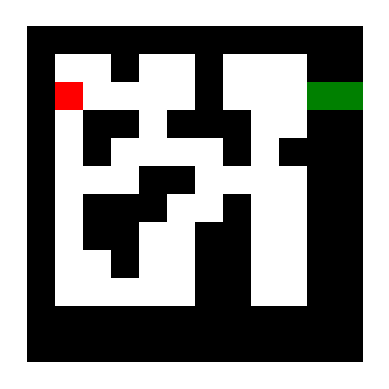

In [59]:
sol = Solver()
sol.readMazeFromMaze(mazeGen)
#sol.readMazeFromFile("/content/Labirinti/maze_10_size/maze_0_10.txt") #Se lo voglio leggere da un file
sol.showMaze()

Risolvo il labirinto con il backtraking

In [60]:
sol.backtrakingSolver()
best = sol.returnBestSolution()

Visualizzo lo score ottimo e visualizzo la soluzione

best score: -31


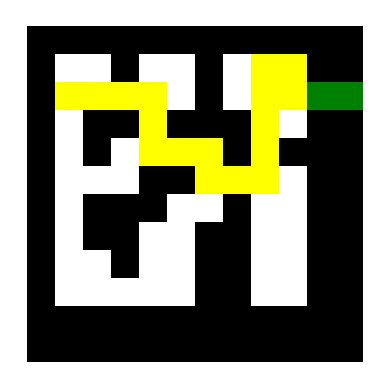

In [61]:
print(f"best score: {best[1]}")
sol.printSolutionPath(best[0])

Risolvo il labirinto con Dijkstra

Best solution Dijkstra: -9


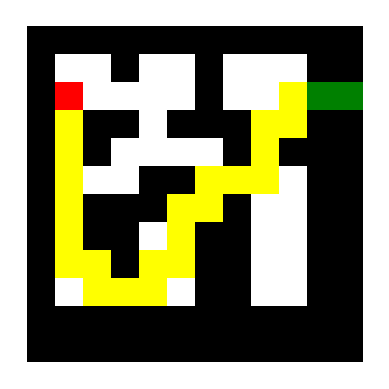

In [62]:
solutionParam = sol.solveDijkstra()
print(f"Best solution Dijkstra: {solutionParam[0]}")
sol.printSolutionPath(solutionParam[1])

Risolvo il labirinto con A*

best solution A-star: -9


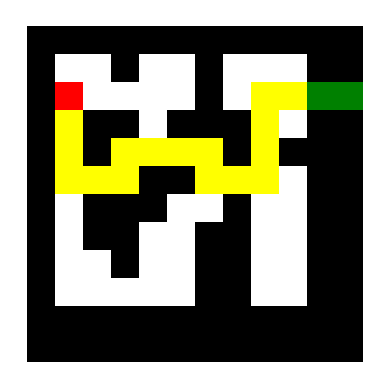

In [63]:
solutionParam = sol.solveAstar()
print(f"best solution A-star: {solutionParam[0]}")
sol.printSolutionPath(solutionParam[1])

Risolvo il labirinto con l'algoritmo Greedy

Best solution greedy: -9


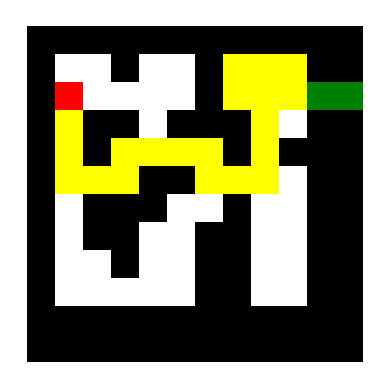

In [64]:
solutionParam = sol.solveGreedy()
print(f"Best solution greedy: {solutionParam[0]}")
sol.printSolutionPath(solutionParam[1])

In [52]:
def matchgraph_gap(dict1,dict2,dict3,names):
  keys_dict1 = list(sorted(dict1.keys()))
  keys_dict2 = list(sorted(dict2.keys()))
  keys_dict3 = list(sorted(dict3.keys()))

  gap_dict1 = [dict1[key][0] for key in keys_dict1]
  gap_dict2 = [dict2[key][0] for key in keys_dict2]
  gap_dict3 = [dict3[key][0] for key in keys_dict3]

  plt.plot(keys_dict1, gap_dict1, color='red', label='Gap Medi ' + str(names[0]))
  plt.plot(keys_dict1, gap_dict2, color='blue', label= f'Gap Medi '+ str(names[1]))
  plt.plot(keys_dict1, gap_dict3, color='black', label='Gap Medi '+ str(names[2]))

  plt.xlabel('Dimensione del labirinto')
  plt.ylabel('Gap Medi')
  plt.legend()
  plt.show()

def matchgraph_time(dict1,dict2,dict3,names):
  
  keys_dict1 = list(sorted(dict1.keys()))
  keys_dict2 = list(sorted(dict2.keys()))
  keys_dict3 = list(sorted(dict3.keys()))

  time_dict1 = [(dict1[key][1]*1000) for key in keys_dict1] 
  time_dict2 = [(dict2[key][1]*1000) for key in keys_dict2] 
  time_dict3 = [(dict3[key][1]*1000) for key in keys_dict3] 

  plt.plot(keys_dict1, time_dict1, color='red', label='Tempi di Esecuzione * 1000 '+ str(names[0]))
  plt.plot(keys_dict1, time_dict2, color='purple', label= 'Tempi di Esecuzione * 1000 '+ str(names[1]))
  plt.plot(keys_dict1, time_dict3, color='green', label='Tempi di Esecuzione * 1000 '+ str(names[2]))

  plt.xlabel('Dimensione del labirinto')
  plt.ylabel('Tempi di Esecuzione')
  plt.legend()
  plt.show()

def solution_table(dict1,dict2,dict3):
    # Recupera le chiavi da tutti i dizionari
    dictionaries = {'Djikstra': dict1, 'Greedy': dict2, 'A*': dict3}
    keys = sorted(set().union(*dictionaries.values()))

    # Creazione della tabella
    table = PrettyTable()
    field_names = ["Algoritmo"] + list(keys)
    table.field_names = field_names

    # Iterazione sulle chiavi e confronto dei valori per ciascun dizionario
    for dictionary_name, dictionary in dictionaries.items():
        row = [dictionary_name] + [dictionary.get(key, '') for key in keys]
        table.add_row(row)

    print(table)

np.seterr(divide = 'ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [42]:
class Stimatore:
  __labyrGen = MazeGenerator(10)
  __basepath = "/content/Labirinti/"
  __basepathBench = "/content/Benchmark/"
  __labyrSolv = Solver() #Risolutore Labirinti

  #Effettuano un confronto benckmark 

  # Il confronto benckmark fa la differenza in valore assoluto del best score e la soluzione trovata dall'algoritmo 
  # Mentresi fanno questa valutazioni, andiamo anche a considerare il tempo di esecuzione dell'algoritmo in se 
  # Ogni misurazione sono fatti in media, con 5 sample (ma possono aumentare nella misura in cui si riescono a generare istanze benchmark)
  def benchDijk(self,samples): 
    dict = {}
    time1 = 0
    time2 = 0
    keys = self.__createKeyForBenck()
    for key in keys:
      measure = 0
      gap_a = 0
      for sample in range(samples):
        bestSolPath = self.__basepathBench + "benchmaze_"+str(sample)+"_"+str(key)+".txt"
        path = self.__basepathBench + "maze_"+str(sample)+"_"+str(key)+".txt"
        best = self.__readBestSolution(bestSolPath)
        self.__labyrSolv.readMazeFromFile(path)
        time1 = time.process_time()
        result = self.__labyrSolv.solveDijkstra()[0]
        time2 = time.process_time()
        timeDiff = time2-time1
        measure += timeDiff
        if(result < 0 and best < 0):
          gap_a += (abs(best) - abs(result))
        elif(result > 0 and best > 0):
          gap_a += (result - best)
        else:
          gap_a += (abs(best) + abs(result))
      measure = measure/samples
      gap_a = gap_a/samples
      dict[key] = (gap_a,measure)
    return dict

  def benchGreedy(self,samples):
    dict = {}
    time1 = 0
    time2 = 0
    keys = self.__createKeyForBenck()
    for key in keys:
      measure = 0
      gap_a = 0
      for sample in range(samples):
        bestSolPath = self.__basepathBench + "benchmaze_"+str(sample)+"_"+str(key)+".txt"
        path = self.__basepathBench + "maze_"+str(sample)+"_"+str(key)+".txt"
        best = self.__readBestSolution(bestSolPath)
        self.__labyrSolv.readMazeFromFile(path)
        time1 = time.process_time()
        result = self.__labyrSolv.solveGreedy()[0]
        time2 = time.process_time()
        timeDiff = time2-time1
        measure += timeDiff
        if(result < 0 and best < 0):
          gap_a += (abs(best) - abs(result))
        elif(result > 0 and best > 0):
          gap_a += (result - best)
        else:
          gap_a += (abs(best) + abs(result))
      measure = measure/samples
      gap_a = gap_a/samples
      dict[key] = (gap_a,measure)
    return dict

  def benchAStar(self,semples):
    dict = {}
    time1 = 0
    time2 = 0
    keys = self.__createKeyForBenck()
    for key in keys:
      measure = 0
      gap_a = 0
      for sample in range(semples):
        bestSolPath = self.__basepathBench + "benchmaze_"+str(sample)+"_"+str(key)+".txt"
        path = self.__basepathBench + "maze_"+str(sample)+"_"+str(key)+".txt"
        best = self.__readBestSolution(bestSolPath)
        self.__labyrSolv.readMazeFromFile(path)
        time1 = time.process_time()
        result = self.__labyrSolv.solveAstar()[0]
        time2 = time.process_time()
        timeDiff = time2-time1
        measure += timeDiff
        if(result < 0 and best < 0):
          gap_a += (abs(best) - abs(result))
        elif(result > 0 and best > 0):
          gap_a += (result - best)
        else:
          gap_a += (abs(best) + abs(result))
      measure = measure/semples
      gap_a = gap_a/semples
      dict[key] = (gap_a,measure)
    return dict
  
  def __readBestSolution(self,path):
    with open(path,'r') as file:
      line = file.readline()
      line = file.readline()
      bestsol = int(line)
      file.close()
    return bestsol

  def __createKeyForBenck(self):
    filelist = listdir(self.__basepathBench)
    validFilenames = [] 
    keys = []
    for filename in filelist:
      if(filename.startswith("benchmaze")):
        validFilenames.append(filename)
    for validfile in validFilenames:
      explodedStr = validfile.split("_")
      size = int(explodedStr[2].split(".")[0])
      if(size not in keys):
        keys.append(size)
    return keys

  #Effettuano un confronto su istanze non risolte all'ottimo
  def stimateSolDijk(self,from_v,to,step,n_lab): 
    solutions = {}
    for size in range(from_v,to,step):
      j = 0
      while j < n_lab:
        path = self.__basepath + "maze_"+str(size)+"_size/" + "maze_"+str(j)+"_"+str(size)+".txt"
        self.__labyrSolv.readMazeFromFile(path)
        solutions[size] = self.__labyrSolv.solveDijkstra()[0]
        j +=1
    return solutions 
        

  def stimateSolGreedy(self,from_v,to,step,n_lab):
    solutions = {}
    for size in range(from_v,to,step):
      j = 0
      while j < n_lab:
        path = self.__basepath + "maze_"+str(size)+"_size/" + "maze_"+str(j)+"_"+str(size)+".txt"
        self.__labyrSolv.readMazeFromFile(path)
        solutions[size] = self.__labyrSolv.solveAstar()[0]
        j +=1
    return solutions 

  def stimateSolAstar(self,from_v,to,step,n_lab):
    solutions = {}
    for size in range(from_v,to,step):
      j = 0
      while j < n_lab:
        path = self.__basepath + "maze_"+str(size)+"_size/" + "maze_"+str(j)+"_"+str(size)+".txt"
        self.__labyrSolv.readMazeFromFile(path)
        solutions[size] = self.__labyrSolv.solveGreedy()[0]
        j +=1
    return solutions 

  def stimateGenTimeBack(self,from_v,to,step):  #Funzione che stima il tempo di generazione del backtracking, restituisce un dizionario con i valori medi di generazione
    key = range(from_v,to,step)
    dict = {}
    time1 = 0
    time2 = 0
    tim_sum = 0
    measure = 0
    for element in key:
      self.__labyrGen.setSize(element)
      for i in range(5):
        self.__labyrGen.genereteWithSettedSize()
        time1 = time.process_time()
        self.__labyrGen.generateBack()
        time2 = time.process_time()
        tim_sum += (time2-time1)
      measure = tim_sum/5
      dict[element] = measure
    return dict

  def stimateGenTimeGT(self,from_v,to,step):  #Funzione che stima il tempo di generazione del backtracking, restituisce un dizionario con i valori medi di generazione
    key = range(from_v,to,step)
    dict = {}
    time1 = 0
    time2 = 0
    tim_sum = 0
    measure = 0
    for element in key:
      self.__labyrGen.setSize(element)
      for i in range(5):
        self.__labyrGen.genereteWithSettedSize()
        time1 = time.process_time()
        self.__labyrGen.generateGT()
        time2 = time.process_time()
        tim_sum += (time2-time1)
      measure = tim_sum/5
      dict[element] = measure
    return dict

  def stimateGenTimePrimm(self,from_v,to,step):  #Funzione che stima il tempo di generazione del backtracking, restituisce un dizionario con i valori medi di generazione
    key = range(from_v,to,step)
    dict = {}
    time1 = 0
    time2 = 0
    tim_sum = 0
    measure = 0
    for element in key:
      self.__labyrGen.setSize(element)
      for i in range(5):
        self.__labyrGen.genereteWithSettedSize()
        time1 = time.process_time()
        self.__labyrGen.generateMazePrimm()
        time2 = time.process_time()
        tim_sum += (time2-time1)
      measure = tim_sum/5
      dict[element] = measure
    return dict

  def generateLabyrintForSolving(self,from_v,to,step,n_labirint): #Permette di generare e salvare su file e cartelle un certo numero di labirinti
    labyrintName = ""
    folder = ""
    maze_size = range(from_v,to,step)
    for i in maze_size:
      folder = "maze_"+str(i)+"_size/"
      path = self.__basepath+folder
      if(not exists(path)):
          mkdir(path)
      self.__labyrGen.setSize(i)
      j = 0
      while j < n_labirint :
        self.__labyrGen.genereteWithSettedSize()
        labyrintName = "maze_"+str(j)+"_"+str(i)+".txt"
        path = self.__basepath + folder + labyrintName
        self.__labyrGen.generateMazePrimm()
        self.__labyrGen.makeImperfet()
        self.__labyrGen.placeEU()
        self.__labyrGen.fillWithValues()
        self.__labyrGen.file_printing_maze(path)
        j += 1

  def generateBenchmarkIstances(self,sizes,sampleForSize): #genera le istanze benchmark, in ingresso ho un vettore di dimensioni e quanti oggetti per ogni dimensione voglio generare 
    maze_filename = ""
    maze_bench_filename = ""
    path = ""
    index_for_num_lab = 0
    for i in sizes:
      if(i > 15):
        print("La valutazione per questo tipo di labirinto è molto alta, stoppare il processo se dura troppo")
      self.__labyrGen.setSize(i)
      for j in range(sampleForSize[index_for_num_lab]):
        self.__labyrGen.genereteWithSettedSize()
        maze_filename = "maze_"+str(j)+"_"+str(i)+".txt"
        path = self.__basepathBench + maze_filename
        self.__labyrGen.generateMazePrimm()
        self.__labyrGen.makeFullyConnected()
        self.__labyrGen.placeEU()
        self.__labyrGen.fillWithValues()
        self.__labyrGen.file_printing_maze(path)
        self.__labyrSolv.readMazeFromMaze(self.__labyrGen)
        self.__labyrSolv.showMaze()
        print(f"Grandezza: {i} labirinto n: {j}")
        self.__labyrSolv.backtrakingSolver()
        benStats = self.__labyrSolv.returnBestSolution()
        maze_bench_filename = "bench"+"maze_"+str(j)+"_"+str(i)+".txt"
        path = self.__basepathBench + maze_bench_filename
        self.__printStats(benStats,path)
      index_for_num_lab += 1

  def __printStats(self,stats,path):
    with open(path,'w') as file:
      for i in stats[0]:
        coordinate = str(i[0]) + ',' + str(i[1])
        file.write(coordinate)
        file.write(";")
      file.write("// \n")
      file.write(str(stats[1]))
      file.close()

  def deleteFileFolders(self,from_v,to,step): #cancella le cartelle, è una funzione di utilità 
    key = range(from_v,to,step)
    folder = ""
    for i in key:
      folder = "maze_"+str(i)+"_size/"
      path = self.__basepath + folder
      for filename in listdir(path):
        file = path + filename
        if(exists(file) and isfile(file)):
          remove(file)
  
  def __stimateDifficulty(self): #Stima di difficoltà del labirinto, il labirinto deve essere temporaneamente riempito di valori per stimarne la difficoltà
    size = self.__labyrGen.getSize()
    delta = self.__labyrGen.getManhattanDistEU()
    self.__labyrSolv.readMazeFromMaze(self.__labyrGen)
    self.__labyrSolv.backtrakingSolver()
    solution = self.__labyrSolv.returnBestSolution()
    if(solution[0] != (-1,-1) and solution[0] != (-1, )):
      c_d = self.__countDirectionChangeOnSolution(solution[0])
      if(c_d == 0): c_d = 1
      p_f = len(solution[0])
      d_e = self.__labyrGen.countDeadEnds()
      d_func = (delta*(size) + c_d*(p_f) + (d_e/c_d))
      if(d_func == 0):
        print(f"Errore con parametri {size} {delta} {c_d} {p_f} {d_e}")
    else:
      d_func = -1
    return d_func
  
  def stimateDifficultyPrimm(self,from_v,to,step): #Stima la difficoltà dei labirinti generati da Primm e il suo failRate 
    sizes = range(from_v,to,step)
    average = 0
    fail_rate = 0
    dict = {}
    for size in sizes: 
      self.__labyrGen.setSize(size)
      for i in range(5):
        self.__labyrGen.genereteWithSettedSize()
        self.__labyrGen.generateMazePrimm()
        self.__labyrGen.placeEU()
        self.__labyrGen.fillWithValues()
        difficulty_stat = self.__stimateDifficulty()
        if difficulty_stat == -1:
          i -= 1
          fail_rate += 1
        else:
          average = average + difficulty_stat
      average = (average/5) 
      dict[size] = (average,fail_rate)
      average = 0
    return dict 

  def stimateDifficultyBacktraking(self,from_v,to,step): #Stima la difficoltà dei labirinti generati dal backtraking e il suo fail rate
    sizes = range(from_v,to,step)
    average = 0
    fail_rate = 0
    dict = {}
    for size in sizes: 
      self.__labyrGen.setSize(size)
      i = 0
      while i < 5:
        self.__labyrGen.genereteWithSettedSize()
        self.__labyrGen.generateBack()
        self.__labyrGen.placeEU()
        self.__labyrGen.fillWithValues()
        difficulty_stat = self.__stimateDifficulty()
        if difficulty_stat == -1:
          fail_rate += 1
        else:
          i += 1
          average = average + difficulty_stat
      average = (average/5) 
      dict[size] = (average,fail_rate)
      average = 0
    return dict

  def stimateDifficultyGT(self,from_v,to,step): #Stima la difficoltà dei labirinti generati dall'algoritmo Growing Tree e il suo fail rate 
    sizes = range(from_v,to,step)
    average = 0
    fail_rate = 0
    dict = {}
    for size in sizes: 
      self.__labyrGen.setSize(size)
      for i in range(5):
        self.__labyrGen.genereteWithSettedSize()
        self.__labyrGen.generateGT()
        self.__labyrGen.placeEU()
        self.__labyrGen.fillWithValues()
        difficulty_stat = self.__stimateDifficulty()
        if difficulty_stat == -1: #Se non è risolvibile
          i -= 1
          fail_rate += 1
        else:
          average = average + difficulty_stat
      average = (average/5) 
      dict[size] = (average,fail_rate)
      average = 0
    return dict

  def __countDirectionChangeOnSolution(self,solution): #Conta il numero di cambi di direzione della soluzione del labirinto perfetto 
    counter = 0 #counter dei cambi
    coord_vett = solution #vettore delle soluzioni 
    for i in range (len(coord_vett) -1): #verifica fino al penultimo elemento che si confronta con l'uscita, sarebbe inutile confrontare l'uscita col nulla 
      if (coord_vett[i][0] != coord_vett[i+1][0]) or (coord_vett[i][1] != coord_vett[i+1][1]): #se cambia una delle due coordinate allora significa che ci sta un cambio di direzione
        counter+=1 
    return counter

  #UtilityFunction per il barplot di un algoritmo
  def bar_plot(self,dizionario, nome_algoritmo):
      keys = list(dizionario.keys())
      scoring = [(dizionario[key][0])/1000 for key in keys]
      fail_rate = [dizionario[key][1] for key in keys]
      bar_width = 0.25
      index = np.arange(len(keys))
      fig, ax = plt.subplots()

      rects1 = ax.bar(index, scoring, bar_width, label='Scoring(Reduced Value by 1000)') #per migliorarne la visualizzazione
      rects2 = ax.bar([i + bar_width for i in index], fail_rate, bar_width, label='Fail Rate')


      plt.xlabel('Grandezza dei Labirinti')
      plt.ylabel('Scoring/Fail Rate')
      plt.title(f' {nome_algoritmo}')
      ax.set_xticks([i + bar_width / 2 for i in index])
      ax.set_xticklabels(keys)
      plt.legend()
    
      plt.show()

  def plot(self,dizionario):
    x = []
    y = []

    for chiave, valore in dizionario.items():
        x.append(valore)
        y.append(chiave)

    plt.plot(x, y, 'r-')
    plt.xlabel('Size')
    plt.ylabel('Time in seconds')
    plt.title('Grafico Size/Tempo')
    plt.show()

  def match_plot(self,dict1, dict2, dict3,names):
    x1 = []
    x2 = []
    x3 = []
    y1 = []
    y2 = []
    y3 = []

    for chiave, valore in dict1.items():
        x1.append(chiave)
        y1.append(valore)
    for chiave, valore in dict2.items():
        x2.append(chiave)
        y2.append(valore)
    for chiave, valore in dict3.items():
        x3.append(chiave)
        y3.append(valore)

    
    plt.plot(x1, y1,'r-',label = str(names[0]))
    plt.plot(x2, y2,'b-',label = str(names[1]))
    plt.plot(x3, y3,'g-',label = str(names[2]))
    plt.scatter(x1, y1, color='red',label=str(names[0]))
    plt.scatter(x2, y2, color='blue',label=str(names[1]))
    plt.scatter(x3, y3, color='green',label = str(names[2]))
    plt.xlim(0, 100)
    plt.ylim(0,0.60)

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    plt.xlabel('Size')
    plt.ylabel('Time in seconds')
    plt.title('Size/Time Plot')
    plt.legend()
    plt.show()


In [ ]:
stim = Stimatore()
#stim.deleteFileFolders(10,100,10)

Genero le istanze da risolvere

In [44]:
stim.generateLabyrintForSolving(20,100,10,1)

Genero le istanze Benchmark

In [ ]:
#stim.generateBenchmarkIstances([5,7,10,15,16],[3,3,3,3,3])

Stimo i tempi di generazione dei labirinti

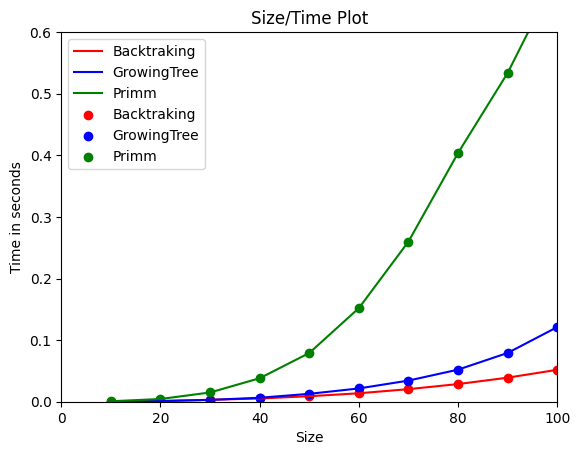

In [46]:
stimBack = stim.stimateGenTimeBack(10,110,10)
stimGT = stim.stimateGenTimeGT(10,110,10)
stimPrimm = stim.stimateGenTimePrimm(10,110,10)
stim.match_plot(stimBack,stimGT,stimPrimm,["Backtraking","GrowingTree","Primm"])

Stimo quanto difficili vengono generati i labirinti e se il labirinto generato è non risolvibile (failrate) 

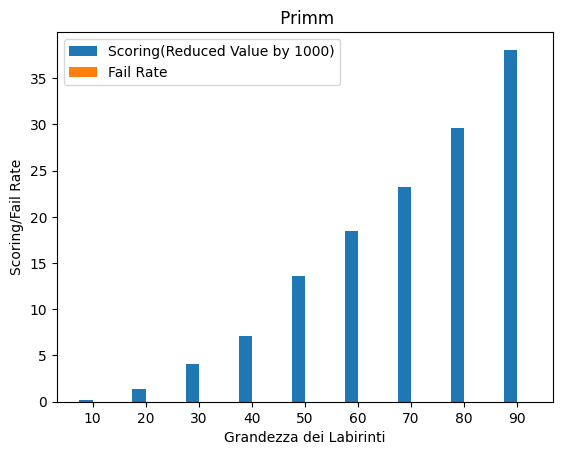

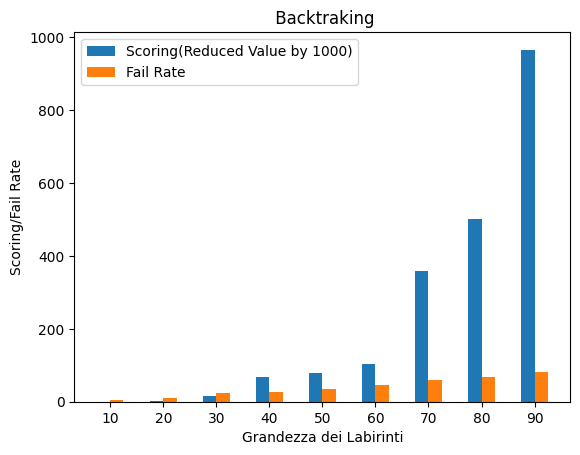

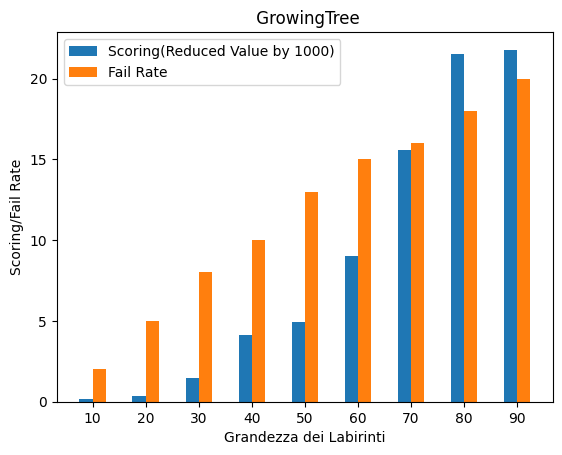

In [47]:
stima = stim.stimateDifficultyPrimm(10,100,10)
stim.bar_plot(stima,"Primm")
stima = stim.stimateDifficultyBacktraking(10,100,10)
stim.bar_plot(stima,"Backtraking")
stima = stim.stimateDifficultyGT(10,100,10)
stim.bar_plot(stima,"GrowingTree")

Eseguo il benchmark degli algoritmi euristici 

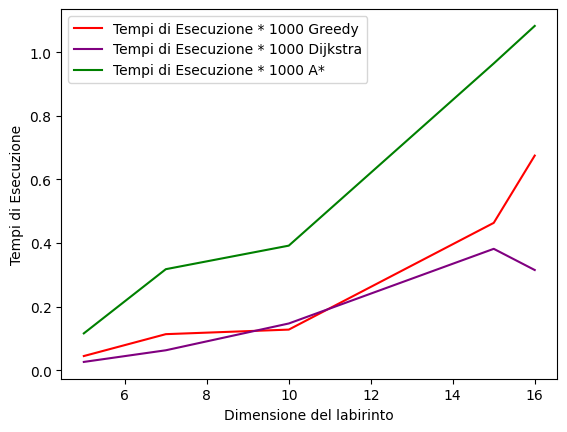

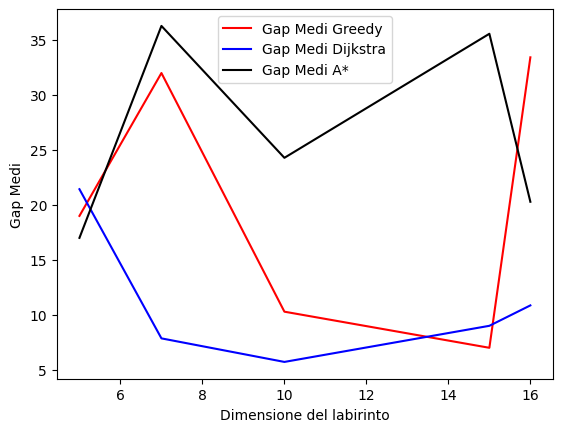

In [50]:
stimGreedy = stim.benchGreedy(7)
stimDijkstra = stim.benchDijk(7)
stimAstar = stim.benchAStar(7)
matchgraph_time(stimGreedy,stimDijkstra,stimAstar,["Greedy","Dijkstra","A*"])
matchgraph_gap(stimGreedy,stimDijkstra,stimAstar,["Greedy","Dijkstra","A*"])

Testo gli algoritmi euristici su labirinti non risolti all'ottimo

In [54]:
stim_solDijk = stim.stimateSolDijk(20,100,10,1)
stim_solGreed = stim.stimateSolGreedy(20,100,10,1)
stim_solAstar = stim.stimateSolAstar(20,100,10,1)

solution_table(stim_solDijk,stim_solGreed,stim_solAstar)

+-----------+-----+----+-----+----+----+-----+-----+-----+
| Algoritmo |  20 | 30 |  40 | 50 | 60 |  70 |  80 |  90 |
+-----------+-----+----+-----+----+----+-----+-----+-----+
|  Djikstra |  14 | 10 |  2  | 43 | 43 | -61 |  8  | -65 |
|   Greedy  | -11 | 28 | -27 | 59 | 51 | -46 | -30 | -65 |
|     A*    |  14 | 10 |  2  | 43 | 43 | -51 | -30 | -65 |
+-----------+-----+----+-----+----+----+-----+-----+-----+


# Sezione di appoggio per idee di codice

Questo mi può servire, quindi lo conservo, poichè è una implementazione del backtracking iterativamente quindi potrei pensare di integrarlo al progetto 

In [ ]:

def create_maze_bt(size):
    maze = [['W'] * size for _ in range(size)]  # Crea una matrice quadrata inizializzata con tutti i muri
    stack = [(1, 1)]  # Inizia dalla cella iniziale (1, 1)

    while stack:
        x, y = current = stack[-1]
        maze[y][x] = 'C'  # Imposta la cella corrente come parte del labirinto

        # Trova le celle vicine non visitate
        neighbors = [(x - 2, y), (x + 2, y), (x, y - 2), (x, y + 2)]
        unvisited_neighbors = []

        for nx, ny in neighbors:
            if 0 < nx < size and 0 < ny < size and maze[ny][nx] == 'W':
                unvisited_neighbors.append((nx, ny))

        if unvisited_neighbors:
            nx, ny = random.choice(unvisited_neighbors)
            wall_x = x + (nx - x) // 2
            wall_y = y + (ny - y) // 2
            maze[wall_y][wall_x] = 'C'  # Rimuovi il muro tra la cella corrente e quella scelta
            stack.append((nx, ny))
        else:
            stack.pop()  # Nessuna cella vicina non visitata, torna indietro (backtracking)

    return maze


create_maze_bt(4)

Questa versione modifica l'algoritmo precedente per utilizzare il backtracking esplicito. Ad ogni iterazione, viene selezionata casualmente una cella vicina non visitata e viene rimosso il muro tra la cella corrente e quella selezionata. Se non ci sono celle vicine non visitate, il backtracking avviene rimuovendo l'ultima cella visitata dalla pila (stack.pop()). Questo processo continua fino a quando non vengono visitate tutte le celle del labirinto.

FUNZIONI PER IL SOLUTORE 

per A* :  Il labirinto deve ancora essere rappresentato come una matrice in cui gli spazi liberi sono contrassegnati con 0, gli ostacoli con 1, il punto di partenza con 2 e il punto di destinazione con 3. L'algoritmo troverà quindi il percorso ottimo dal punto di partenza al punto di destinazione all'interno del labirinto.

per Dijkstra: bisogna assicurarsi che il labirinto sia in formato 0 e 1

In [ ]:
#definizione delle funzioni che ci servono per il Solutore
#Implementiamo gli algoritmi di Backatracking, A* e Djikstra. 
class Solver:
  ######A STAR#######
    def __init__(self, maze):
        self.maze = maze
        self.directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        self.rows = len(maze)
        self.cols = len(maze[0])

    def solve(self):
        start = None
        end = None
        for i in range(self.rows):
            for j in range(self.cols):
                if self.maze[i][j] == 'E':
                    start = (i, j)
                elif self.maze[i][j] == 'U':
                    end = (i, j)

        priority_queue = []
        distances = {}
        heapq.heappush(priority_queue, (0, start))
        distances[start] = 0

        previous = {}
        previous[start] = None

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            if current_node == end:
                break

            for direction in self.directions:
                dx, dy = direction
                neighbor = (current_node[0] + dx, current_node[1] + dy)

                if self.is_valid(neighbor):
                    new_distance = current_distance + 1

                    if neighbor not in distances or new_distance < distances[neighbor]:
                        distances[neighbor] = new_distance
                        previous[neighbor] = current_node
                        priority = new_distance + self.heuristic(neighbor, end)
                        heapq.heappush(priority_queue, (priority, neighbor))

        # Costruisci il percorso più breve
        path = []
        current = end
        while current != start:
            path.append(current)
            current = previous[current]
        path.append(start)
        path.reverse()

        # Contrassegna le celle del percorso soluzione come "S"
        for position in path:
            x, y = position
            self.maze[x][y] = 'S'

        return self.maze

    def is_valid(self, position):
        x, y = position
        return 0 <= x < self.rows and 0 <= y < self.cols and self.maze[x][y] != 'w'

    def heuristic(self, position, end):
        x1, y1 = position
        x2, y2 = end
        return abs(x1 - x2) + abs(y1 - y2)
  ###### DIJKSTRA #########
    def __init__(self, maze):
        self.maze = maze
        self.directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        self.rows = len(maze)
        self.cols = len(maze[0])

    def solve(self):
        start = None
        end = None
        for i in range(self.rows):
            for j in range(self.cols):
                if self.maze[i][j] == 'E':
                    start = (i, j)
                elif self.maze[i][j] == 'U':
                    end = (i, j)

        priority_queue = []
        distances = {}
        heapq.heappush(priority_queue, (0, start))
        distances[start] = 0

        previous = {}
        previous[start] = None

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            if current_node == end:
                break

            for direction in self.directions:
                dx, dy = direction
                neighbor = (current_node[0] + dx, current_node[1] + dy)

                if self.is_valid(neighbor):
                    new_distance = current_distance + 1

                    if neighbor not in distances or new_distance < distances[neighbor]:
                        distances[neighbor] = new_distance
                        previous[neighbor] = current_node
                        heapq.heappush(priority_queue, (new_distance, neighbor))

        # Costruisci il percorso più breve
        path = []
        current = end
        while current != start:
            path.append(current)
            current = previous[current]
        path.append(start)
        path.reverse()

        # Contrassegna le celle del percorso soluzione con "S"
        for position in path:
            x, y = position
            if self.maze[x][y] != 'E' and self.maze[x][y] != 'U':
                self.maze[x][y] = 'S'

        return self.maze

    def is_valid(self, position):
        x, y = position
        return 0 <= x < self.rows and 0 <= y < self.cols and self.maze[x][y] != 'w'

#####FUNZIONE RISOLUZIONE BACKTRACKING ##########
    def __init__(self, labirinto):
        self.labirinto = labirinto
        self.dimensioneLabirinto = len(labirinto)
        self.soluzione = self.inizializzaMatriceVuota()

    def risolviLabirinto(self):
        inizio = self.trovaPosizioneInizio()
        risultato = self.esplora(inizio)
        return risultato

    def esplora(self, posizione):
        x, y = posizione

        # Controlla se la posizione corrente è l'uscita
        if self.labirinto[x][y] == 'U':
            self.soluzione[x][y] = 'S'
            return True

        # Controlla se la posizione corrente è valida e percorribile
        if self.posizioneValida(posizione):
            # Contrassegna la posizione corrente come parte della soluzione
            self.soluzione[x][y] = 'S'

            # Prova a muoversi in tutte le direzioni possibili
            direzioni = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Destra, Giù, Sinistra, Su
            for direzione in direzioni:
                nuovaX = x + direzione[0]
                nuovaY = y + direzione[1]
                nuovaPosizione = (nuovaX, nuovaY)

                # Se la nuova posizione è valida, esplorala ricorsivamente
                if self.posizioneValida(nuovaPosizione) and self.soluzione[nuovaX][nuovaY] != 'S':
                    risultato = self.esplora(nuovaPosizione)
                    if risultato:
                        return True

            # Se nessuna delle direzioni ha portato alla soluzione, contrassegna la posizione corrente come non parte della soluzione
            self.soluzione[x][y] = 'c'

        # Se la posizione corrente non è valida o nessuna delle direzioni ha portato alla soluzione, torna indietro
        return False

    def posizioneValida(self, posizione):
        x, y = posizione

        # Controlla se la posizione è all'interno del labirinto
        if x >= 0 and x < self.dimensioneLabirinto and y >= 0 and y < self.dimensioneLabirinto:
            # Controlla se la posizione non è un muro
            if self.labirinto[x][y] != 'w':
                return True

        return False

    def trovaPosizioneInizio(self):
        # Cerca l'entrata nel labirinto
        for x in range(self.dimensioneLabirinto):
            for y in range(self.dimensioneLabirinto):
                if self.labirinto[x][y] == 'E':
                    return (x, y)

        # Se l'entrata non viene trovata, restituisce None
        return None

    def inizializzaMatriceVuota(self):
        return [[' ' for _ in range(self.dimensioneLabirinto)] for _ in range(self.dimensioneLabirinto)]


  #####FUNZIONE CHE SERVE PER VISUALIZZARE LA SOLUZIONE 
    def solution_view(self):
      nrows = len(self.__maze)
      ncols = len(self.__maze[0])
      fig, ax = plt.subplots()
      ax.set_aspect('equal')
      for row in range(nrows):
        for col in range(ncols):
            if self.__maze[row][col] == self.__enumCellStatus.wall_l:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='black', linewidth=1))
            elif self.__maze[row][col] == self.__enumCellStatus.visited:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='white', linewidth=1))
            elif self.__maze[row][col] == self.__enumCellStatus.solution:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='orange', linewidth=1))
            elif self.__maze[row][col] == self.__enumCellStatus.exit_l:
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='red'))
            elif self.__maze[row][col] == self.__enumCellStatus.entrance_l: 
                ax.add_patch(plt.Rectangle((col, nrows - row - 1), 2, 2, facecolor='green')) 

            # Calcola le coordinate del centro della cella
            center_x = col + 1
            center_y = nrows - row - 2

            # Ottieni il valore della cella
            cell_value = self.__maze[row][col]

            # Aggiungi il valore come testo al centro della cella
            ax.text(center_x, center_y, cell_value, ha='center', va='center')

      ax.autoscale_view()
      plt.axis('off')
      plt.show()
   
   
    def getSols(self):
        return self.__solutions

In [ ]:
class Evaluator: 
  def getSols(self):
      return self.__solutions
   #Permette di calcolare la distanza di manhattan tra ingresso ed uscita
  def getManhattanDistEU(self):
    return (np.abs(self.__entrance[0] - self.__exit[0]) + np.abs(self.__entrance[1] - self.__exit[1]))
  #numero di celle che definiscono la soluzione
  def solutions_cell(self):
      nrows = self.__maze.size[0]
      ncols = self.__maze.size[1]
      counter = 0
      for row in range(nrows):
        for col in range(ncols):
          if self.__maze[row][col] == self.__enumCellStatus.solution:
                counter +=1
      return counter    
   #numero di cambi di direzione   
  def counter_change_directions(self):
      counter = 0 #counter dei cambi
      coord_vett = getSols(self.__maze) #vettore delle soluzioni 
      for i in range (coord_vett.size -1): #verifica fino al penultimo elemento che si confronta con l'uscita, sarebbe inutile confrontare l'uscita col nulla 
          if (coord_vett[i][0] != coord_vett[i+1][0]) or (coord_vett[0][i] != coord_vett[0][i+1]): #se cambia una delle due coordinate allora significa che ci sta un cambio di direzione
            counter+=1 
      return counter
  
  
  #numero di dead_ends
  def counter_dead_ends(self):
      nrows = self.__maze.size[0]
      ncols = self.__maze.size[1]
      counter_dead_end = 0
      counter_wall = 0 
      for row in range(nrows):
        for col in range(ncols):
         if self.__maze[row][col] == self.__enumCellStatus.visited:
          if self.__maze[row+1][col] == self.__enumCellStatus.wall_l:
              counter_wall+=1
          if self.__maze[row-1][col] == self.__enumCellStatus.wall_l:
            counter_wall+=1
          if self.__maze[row][col-1] == self.__enumCellStatus.wall_l:
            counter_wall+=1
          if self.__maze[row][col+1] == self.__enumCellStatus.wall_l:
            counter_wall+=1
         if counter_wall == 3:
          counter_dead_end+=1
      return counter_dead_end
  #funzione dello scoring       
  def scoring(self):
      alpha = getManhattanDistEU(self.__maze)
      size = self.__maze.size[0]
      change_directions = counter_change_directions(self.__maze)
      dead_end = counter_dead_ends(self.__maze)
      s_cell = solutions_cell(self.__maze) 
      score = (alpha*size) + (change_directions * s_cell) + (dead_end/change_directions) 
      return score

In [ ]:
def generateKruskal(self):
    self.__createWall()
    sets = [[(row, col)] for row in range(len(self.__maze)) for col in range(len(self.__maze))]
    walls = []
    # Aggiungi i muri iniziali alla lista dei muri
    for row in range(len(self.__maze) - 1):
        for col in range(len(self.__maze) - 1 ):
            walls.append((row,col))
            if row > 0 and row < len(self.__maze)-1 and col % 2 == 0:
                walls.append([(row, col), (row - 1, col)])  # Muro sopra
            if col > 0 and col < len(self.__maze)-1 and row % 2 == 0:
                walls.append([(row, col), (row, col - 1)])  # Muro a sinistra
    random.shuffle(walls)
    # Rimuovi i muri fino a quando tutte le celle non sono collegate
    while len(sets) > 1 and walls:
        wall = walls.pop(0)
        cell1, cell2 = wall
        print(f"extractedWall: {wall} cella 1: {cell1} cella2: {cell2}")
        if not self.__same_set(sets,cell1, cell2):
            row1, col1 = cell1
            row2, col2 = cell2

            if row1 == row2:
                # Celle sulla stessa riga, quindi rimuovi il muro orizzontale
                self.__maze[row1][max(col1, col2)] = self.__enumCellStatus.visited
            else:
                # Celle sulla stessa colonna, quindi rimuovi il muro verticale
                self.__maze[max(row1, row2)][col1] = self.__enumCellStatus.visited

            # Unisci i due insiemi
            self.__union_sets(sets,self.__find_set(sets,cell1), self.__find_set(sets,cell2))

    self.__makeUnvisitedOuterLayer()
    self.__createWall()

      # Funzione per trovare l'insieme a cui appartiene un determinato elemento
  def __find_set(self,sets,element):
      for index, s in enumerate(sets):
          if element in s:
              return index

  # Funzione per unire due insiemi
  def __union_sets(self,sets,set1, set2):
      sets[set1] += sets[set2]
      del sets[set2]

  # Funzione per controllare se due celle sono nello stesso insieme
  def __same_set(self,sets,cell1, cell2):
      set1 = self.__find_set(sets,cell1)
      set2 = self.__find_set(sets,cell2)
      return set1 == set2


In [ ]:
def generateKruskal(self):
    self.__createWall()
     # Funzione per controllare se una cella è valida
    def is_valid(row, col):
        return 0 <= row < len(self.__maze) and 0 <= col < len(self.__maze)

    # Funzione per ottenere una lista di vicini validi non visitati di una cella
    def get_unvisited_neighbors(row, col):
        neighbors = []
        if is_valid(row - 2, col) and self.__maze[row - 2][col] == self.__enumCellStatus.wall_l:
            neighbors.append((row - 2, col))
        if is_valid(row + 2, col) and self.__maze[row + 2][col] == self.__enumCellStatus.wall_l:
            neighbors.append((row + 2, col))
        if is_valid(row, col - 2) and self.__maze[row][col - 2] == self.__enumCellStatus.wall_l:
            neighbors.append((row, col - 2))
        if is_valid(row, col + 2) and self.__maze[row][col + 2] == self.__enumCellStatus.wall_l:
            neighbors.append((row, col + 2))
        return neighbors

    # Scegli una cella casuale come punto di partenza
    start_row = random.randint(0, len(self.__maze) // 2) * 2
    start_col = random.randint(0, len(self.__maze) // 2) * 2
    self.__maze[start_row][start_col] = self.__enumCellStatus.visited  # Segna la cella iniziale come visitata
    visited_count = 1

    # Aggiungi la cella iniziale al set delle celle attive
    active_cells = set([(start_row, start_col)])

    while visited_count < (len(self.__maze) * len(self.__maze)) // 4:
        # Scegli una cella casuale tra quelle attive
        current_row, current_col = random.choice(list(active_cells))

        # Ottieni i vicini non visitati
        neighbors = get_unvisited_neighbors(current_row, current_col)

        if neighbors:
            # Scegli un vicino casuale e lo collega alla cella corrente
            next_row, next_col = random.choice(neighbors)
            self.__maze[next_row][next_col] = self.__enumCellStatus.visited  # Segna il vicino come visitato

            # Rimuovi il muro tra la cella corrente e il vicino
            if next_row < current_row:
                self.__maze[current_row - 1][current_col] = self.__enumCellStatus.visited
            elif next_row > current_row:
                self.__maze[current_row + 1][current_col] = self.__enumCellStatus.visited
            elif next_col < current_col:
                self.__maze[current_row][current_col - 1] = self.__enumCellStatus.visited
            else:
                self.__maze[current_row][current_col + 1] = self.__enumCellStatus.visited

            # Aggiungi il vicino al set delle celle attive
            active_cells.add((next_row, next_col))
            visited_count += 1
        else:
            # Rimuovi la cella corrente dal set delle celle attive
            active_cells.remove((current_row, current_col))
    self.__makeUnvisitedOuterLayer()
    self.__createWall()

In [ ]:
import random

def generate_maze(rows, cols):
    # Creazione della matrice del labirinto
    maze = [["w" for _ in range(cols)] for _ in range(rows)]

    # Funzione per controllare se una cella è valida
    def is_valid(row, col):
        return 0 <= row < rows and 0 <= col < cols

    # Funzione per ottenere una lista di vicini validi non visitati di una cella
    def get_unvisited_neighbors(row, col):
        neighbors = []
        if is_valid(row - 2, col) and maze[row - 2][col] == "w":
            neighbors.append((row - 2, col))
        if is_valid(row + 2, col) and maze[row + 2][col] == "w":
            neighbors.append((row + 2, col))
        if is_valid(row, col - 2) and maze[row][col - 2] == "w":
            neighbors.append((row, col - 2))
        if is_valid(row, col + 2) and maze[row][col + 2] == "w":
            neighbors.append((row, col + 2))
        return neighbors

    # Scegli una cella casuale come punto di partenza
    start_row = random.randint(0, rows // 2) * 2
    start_col = random.randint(0, cols // 2) * 2
    maze[start_row][start_col] = "v"  # Segna la cella iniziale come visitata
    visited_count = 1

    # Aggiungi la cella iniziale al set delle celle attive
    active_cells = set([(start_row, start_col)])

    while visited_count < (rows * cols) // 4:
        # Scegli una cella casuale tra quelle attive
        current_row, current_col = random.choice(list(active_cells))

        # Ottieni i vicini non visitati
        neighbors = get_unvisited_neighbors(current_row, current_col)

        if neighbors:
            # Scegli un vicino casuale e lo collega alla cella corrente
            next_row, next_col = random.choice(neighbors)
            maze[next_row][next_col] = "v"  # Segna il vicino come visitato

            # Rimuovi il muro tra la cella corrente e il vicino
            if next_row < current_row:
                maze[current_row - 1][current_col] = "v"
            elif next_row > current_row:
                maze[current_row + 1][current_col] = "v"
            elif next_col < current_col:
                maze[current_row][current_col - 1] = "v"
            else:
                maze[current_row][current_col + 1] = "v"

            # Aggiungi il vicino al set delle celle attive
            active_cells.add((next_row, next_col))
            visited_count += 1
        else:
            # Rimuovi la cella corrente dal set delle celle attive
            active_cells.remove((current_row, current_col))

    return maze
    
maze = generate_maze(11,11)
for i in range(len(maze)):
  for j in range(len(maze)):
    print(maze[i][j],end = " ")
  print("\n")


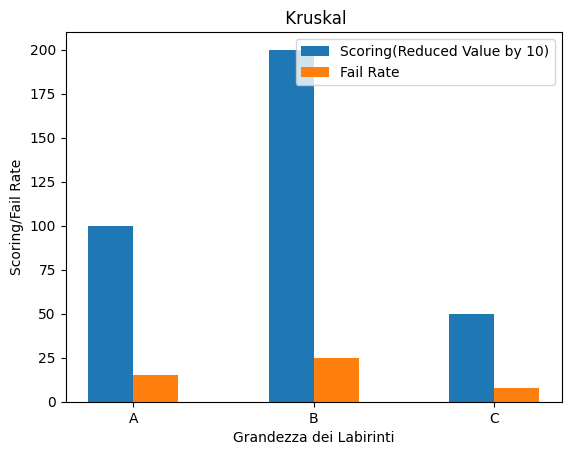

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def bar_plot(dizionario, nome_algoritmo):
    keys = list(dizionario.keys())
    scoring = [(dizionario[key][0])/10 for key in keys]
    fail_rate = [dizionario[key][1] for key in keys]

    bar_width = 0.25
    index = np.arange(len(keys))
    fig, ax = plt.subplots()

    rects1 = ax.bar(index, scoring, bar_width, label='Scoring(Reduced Value by 10)') #per migliorarne la visualizzazione
    rects2 = ax.bar([i + bar_width for i in index], fail_rate, bar_width, label='Fail Rate')


    plt.xlabel('Grandezza dei Labirinti')
    plt.ylabel('Scoring/Fail Rate')
    plt.title(f' {nome_algoritmo}')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(keys)
    plt.legend()
  
    plt.show()

#esempio di utilizzo 

data = {'A': [1000, 15], 'B': [2000, 25], 'C': [500, 8]}

bar_plot(data,'Kruskal')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def combine_bar_plots(grandezze_labirinti_list, fail_rate_list, scoring_list):
    num_plots = len(grandezze_labirinti_list)

    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(12, 5))  # Crea una griglia di assi

    bar_width = 0.25
    index = np.arange(len(grandezze_labirinti_list[0]))  # Assume che le lunghezze siano uguali per tutti i grafici

    for i, ax in enumerate(axes):
        ax.bar(index, scoring_list[i], bar_width, label='Scoring')
        ax.bar(index + bar_width, fail_rate_list[i], bar_width, label='Fail Rate')

        ax.set_xlabel('Grandezza dei Labirinti')
        ax.set_ylabel('Scoring/Fail Rate')
        ax.set_title('Grafico {}'.format(i+1))
        ax.legend()

    plt.tight_layout()  # Regola automaticamente la disposizione degli assi per una migliore visualizzazione
    plt.show()

# Esempio di dati
grandezze_labirinti1 = ['Piccolo', 'Medio', 'Grande']
fail_rate1 = [0.2, 0.15, 0.3]
scoring1 = [0.8, 0.85, 0.7]

grandezze_labirinti2 = ['Piccolo', 'Medio', 'Grande']
fail_rate2 = [0.3, 0.25, 0.2]
scoring2 = [0.7, 0.75, 0.8]

grandezze_labirinti3 = ['Piccolo', 'Medio', 'Grande']
fail_rate3 = [0.15, 0.2, 0.25]
scoring3 = [0.85, 0.8, 0.75]

# Genera il grafico a barre combinato
combine_bar_plots([grandezze_labirinti1, grandezze_labirinti2, grandezze_labirinti3],
                  [fail_rate1, fail_rate2, fail_rate3],
                  [scoring1, scoring2, scoring3])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def combine_bar_plots(grandezze_labirinti_list, fail_rate_list, scoring_list): 
    num_categories = len(grandezze_labirinti_list)

    bar_width = 0.15
    index = np.arange(num_categories)

    fig, ax = plt.subplots()

    for i in range(num_categories):
        offset = i * bar_width
        ax.bar(index + offset, scoring_list[i], bar_width, label='Scoring {}'.format(i+1))
        ax.bar(index + offset + bar_width, fail_rate_list[i], bar_width, label='Fail Rate {}'.format(i+1))

    ax.set_xlabel('Grandezza dei Labirinti')
    ax.set_ylabel('Scoring/Fail Rate')
    ax.set_title('Grafico combinato')

    ax.set_xticks(index + ((num_categories - 1) * bar_width) / 2)
    ax.set_xticklabels(grandezze_labirinti_list)

    ax.legend()
    plt.show()

# Esempio di dati
grandezze_labirinti = ['Piccolo', 'Medio', 'Grande']
fail_rate1 = [0.2, 0.15, 0.3]
scoring1 = [0.8, 0.85, 0.7]
fail_rate2 = [0.3, 0.25, 0.2]
scoring2 = [0.7, 0.75, 0.8]
fail_rate3 = [0.15, 0.2, 0.25]
scoring3 = [0.85, 0.8, 0.75]

# Unisci i dati
combined_grandezze_labirinti = grandezze_labirinti
combined_fail_rate = [fail_rate1, fail_rate2, fail_rate3]
combined_scoring = [scoring1, scoring2, scoring3]

# Genera il grafico a barre combinato
combine_bar_plots(combined_grandezze_labirinti, combined_fail_rate, combined_scoring)



In [ ]:
import pandas as pd

# Creazione di una lista di dizionari contenenti i dati per la tabella
data = [
    {'Nome': 'Alice', 'Età': 25, 'Città': 'Roma'},
    {'Nome': 'Bob', 'Età': 30, 'Città': 'Milano'},
    {'Nome': 'Charlie', 'Età': 35, 'Città': 'Napoli'}
]

# Creazione del DataFrame utilizzando la lista di dizionari
df = pd.DataFrame(data)

# Stampa del DataFrame
print(df)

      Nome  Età   Città
0    Alice   25    Roma
1      Bob   30  Milano
2  Charlie   35  Napoli


In [ ]:
def solution_table(dict1,dict2,dict3):
    # Recupera le chiavi da tutti i dizionari
    dictionaries = {'Djikstra': dict1, 'Greedy': dict2, 'A*': dict3}
    keys = set().union(*dictionaries.values())

    # Creazione della tabella
    table = PrettyTable()
    field_names = ["Dizionario"] + list(keys)
    table.field_names = field_names

    # Iterazione sulle chiavi e confronto dei valori per ciascun dizionario
    for dictionary_name, dictionary in dictionaries.items():
        row = [dictionary_name] + [dictionary.get(key, '') for key in keys]
        table.add_row(row)

    print(table)




data1 = {'Chiave1': 'Valore1', 'Chiave2': 'Valore2', 'Chiave3': 'Valore3'}
data2 = {'Chiave1': 'Valore4', 'Chiave2': 'Valore5', 'Chiave3': 'Valore6'}
data3 = {'Chiave1': 'Valore7', 'Chiave2': 'Valore8', 'Chiave3': 'Valore9'}


solution_table(data1,data2,data3)

+------------+---------+---------+---------+
| Dizionario | Chiave1 | Chiave2 | Chiave3 |
+------------+---------+---------+---------+
|  Djikstra  | Valore1 | Valore2 | Valore3 |
|   Greedy   | Valore4 | Valore5 | Valore6 |
|     A*     | Valore7 | Valore8 | Valore9 |
+------------+---------+---------+---------+
